In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab')
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')
import numpy as np # linear algebra
import pandas as pd

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
df =  pd.read_csv('reviews.csv')
df.head()

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN


In [3]:
print("Jumlah record komentar: ",df.shape[0])

Jumlah record komentar:  61594


In [4]:
import re
def remove_emojis(text):
    return emoji.replace_emoji(text, replace='')

def remove_emojis(text):
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"
        "\U0001F680-\U0001F6FF"
        "\U0001F1E0-\U0001F1FF"
        "\U00002702-\U000027B0"
        "\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def preprocess_text(text):
    # 1. Convert to lowercase
    text = text.lower()

    # 2. Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # 3. Remove emojis
    text = remove_emojis(text)

    # 4. Remove punctuation and special characters, keep only letters and spaces
    text = re.sub(r'[^a-z\s]', '', text)

    # 5. Tokenize
    tokens = word_tokenize(text)

    # 6. Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [w for w in tokens if w not in stop_words]

    # 7. Join tokens back
    cleaned_text = " ".join(filtered_tokens)

    return cleaned_text

In [5]:
df['cleaned_review'] = df['Review'].astype(str).apply(preprocess_text)

In [6]:
print(df[['Review', 'cleaned_review']].head(n=15))

                                               Review  \
0   Great music service, the audio is high quality...   
1   Please ignore previous negative rating. This a...   
2   This pop-up "Get the best Spotify experience o...   
3     Really buggy and terrible to use as of recently   
4   Dear Spotify why do I get songs that I didn't ...   
5   The player controls sometimes disappear for no...   
6   I love the selection and the lyrics are provid...   
7   Still extremely slow when changing storage to ...   
8   It's a great app and the best mp3 music app I ...   
9   I'm deleting this app, for the following reaso...   
10  Love Spotify, and usually this app is the best...   
11                    Can't play Spotify when on WiFi   
12  I had amazon premium music family package and ...   
13  Worst app always says I'm offline and never sh...   
14           i hav any music that i like it is super🙌   

                                       cleaned_review  
0   great music service audio h

In [7]:
df['Review'] = df['cleaned_review']
df.head()

,Time_submitted,Review,Rating,Total_thumbsup,Reply,cleaned_review
0,2022-07-09 15:00:00,great music service audio high quality app eas...,5,2,NaN,great music service audio high quality app eas...
1,2022-07-09 14:21:22,please ignore previous negative rating app sup...,5,1,NaN,please ignore previous negative rating app sup...
2,2022-07-09 13:27:32,popup get best spotify experience android anno...,4,0,NaN,popup get best spotify experience android anno...
3,2022-07-09 13:26:45,really buggy terrible use recently,1,1,NaN,really buggy terrible use recently
4,2022-07-09 13:20:49,dear spotify get songs didnt put playlist shuf...,1,1,NaN,dear spotify get songs didnt put playlist shuf...


In [8]:
def rating_convert(rating):
    if rating >= 4:
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif rating <= 2:
        return "Negative"

In [9]:
df['Rating'] = df['Rating'].apply(rating_convert)
df['length'] = df['Review'].str.len()



In [10]:
df.drop('cleaned_review', axis=1, inplace=True)
df.head()

,Time_submitted,Review,Rating,Total_thumbsup,Reply,length
0,2022-07-09 15:00:00,great music service audio high quality app eas...,Positive,2,NaN,79
1,2022-07-09 14:21:22,please ignore previous negative rating app sup...,Positive,1,NaN,70
2,2022-07-09 13:27:32,popup get best spotify experience android anno...,Positive,0,NaN,70
3,2022-07-09 13:26:45,really buggy terrible use recently,Negative,1,NaN,34
4,2022-07-09 13:20:49,dear spotify get songs didnt put playlist shuf...,Negative,1,NaN,54


In [11]:
df = df.drop(columns=['Time_submitted', 'Reply', 'Total_thumbsup'])

print(df.isnull().sum())
print(df[df.isnull().any(axis=1)])
print(df.info())

Review    0
Rating    0
length    0
dtype: int64
Empty DataFrame
Columns: [Review, Rating, length]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61594 entries, 0 to 61593
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  61594 non-null  object
 1   Rating  61594 non-null  object
 2   length  61594 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.4+ MB
None


In [12]:
def tokenize_text(text):

    tokens = word_tokenize(text.lower())
    return tokens


df['tokens'] = df['Review'].astype(str).apply(tokenize_text)

In [13]:
df[['Review','tokens']].head(n=20)

,Review,tokens
0,great music service audio high quality app eas...,"[great, music, service, audio, high, quality, ..."
1,please ignore previous negative rating app sup...,"[please, ignore, previous, negative, rating, a..."
2,popup get best spotify experience android anno...,"[popup, get, best, spotify, experience, androi..."
3,really buggy terrible use recently,"[really, buggy, terrible, use, recently]"
4,dear spotify get songs didnt put playlist shuf...,"[dear, spotify, get, songs, didnt, put, playli..."
5,player controls sometimes disappear reason app...,"[player, controls, sometimes, disappear, reaso..."
6,love selection lyrics provided song youre list...,"[love, selection, lyrics, provided, song, your..."
7,still extremely slow changing storage external...,"[still, extremely, slow, changing, storage, ex..."
8,great app best mp music app ever used one prob...,"[great, app, best, mp, music, app, ever, used,..."
9,im deleting app following reasons app failing ...,"[im, deleting, app, following, reasons, app, f..."


In [14]:

from sklearn.model_selection import train_test_split

# Assuming 'Review' is your feature column and 'Rating' is your target column
X = df['Review']
y = df['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

label_mapping = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
y_train_numeric = y_train.map(label_mapping)
y_test_numeric = y_test.map(label_mapping)


print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)


Training data shape: (49275,) (49275,)
Testing data shape: (12319,) (12319,)


In [15]:
# prompt: buatkan saya model naive bayes dan tampilkan accurqacy, preccsion, recall, dan f-1 score

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# Initialize and train the Multinomial Naive Bayes model
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_counts, y_train_numeric)

# Predict on the test data
y_pred_numeric = naive_bayes_model.predict(X_test_counts)

# Map numeric predictions back to original labels for evaluation
reverse_label_mapping = {v: k for k, v in label_mapping.items()}
y_pred = [reverse_label_mapping[pred] for pred in y_pred_numeric]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Print a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_mapping.keys()))


Accuracy: 0.7698676840652651
Precision: 0.728024080791047
Recall: 0.7698676840652651
F1-Score: 0.7353959284601544

Classification Report:
              precision    recall  f1-score   support

    Negative       0.71      0.88      0.79      4954
     Neutral       0.28      0.04      0.07      1377
    Positive       0.85      0.85      0.85      5988

    accuracy                           0.77     12319
   macro avg       0.61      0.59      0.57     12319
weighted avg       0.73      0.77      0.74     12319



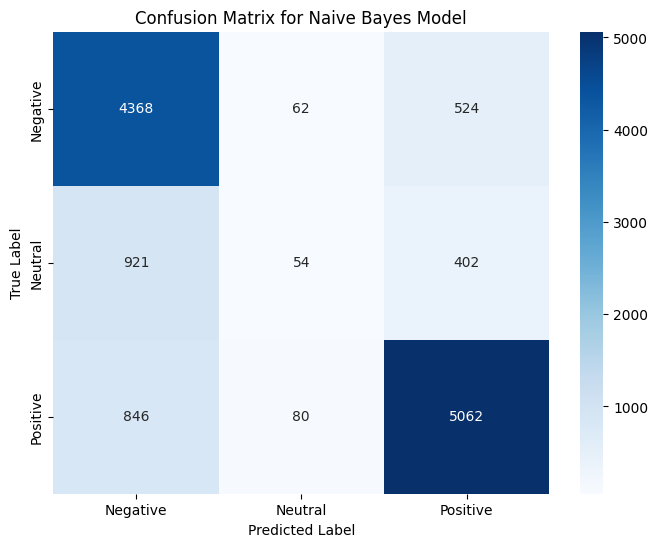

In [16]:
# prompt: buatkan saya conffsion metriks dari naive bayes model

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=list(label_mapping.keys()))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Naive Bayes Model')
plt.show()


In [17]:
# prompt: buatkan saya model Random Forest dan tampilkan accurqacy, preccsion, recall, dan f-1 scorea

from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42) # You can adjust n_estimators
random_forest_model.fit(X_train_counts, y_train_numeric)

# Predict on the test data
y_pred_rf_numeric = random_forest_model.predict(X_test_counts)

# Map numeric predictions back to original labels for evaluation
y_pred_rf = [reverse_label_mapping[pred] for pred in y_pred_rf_numeric]

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print("\nRandom Forest Model Performance:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-Score:", f1_rf)

# Print a detailed classification report for Random Forest
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=label_mapping.keys()))



Random Forest Model Performance:
Accuracy: 0.7737641042292394
Precision: 0.7055645599070481
Recall: 0.7737641042292394
F1-Score: 0.7301481698102473

Random Forest Classification Report:
              precision    recall  f1-score   support

    Negative       0.71      0.88      0.79      4954
     Neutral       0.11      0.00      0.00      1377
    Positive       0.84      0.86      0.85      5988

    accuracy                           0.77     12319
   macro avg       0.55      0.58      0.55     12319
weighted avg       0.71      0.77      0.73     12319



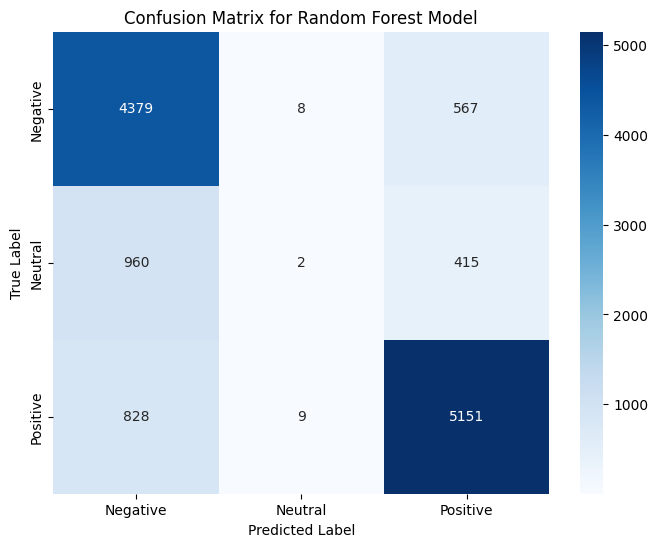

In [18]:
# prompt: buatkan saya conffsion metriks dariRandom Forestmodel

import matplotlib.pyplot as plt
# Calculate the confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf, labels=list(label_mapping.keys()))

# Plot the confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [19]:
# prompt: buatkan saya model SVM dan tampilkan accurqacy, preccsion, recall, dan f-1 scorea

from sklearn.svm import SVC

# Initialize and train the Support Vector Machine (SVM) model
# Using a linear kernel for text data is often a good starting point
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_counts, y_train_numeric)

# Predict on the test data
y_pred_svm_numeric = svm_model.predict(X_test_counts)

# Map numeric predictions back to original labels for evaluation
y_pred_svm = [reverse_label_mapping[pred] for pred in y_pred_svm_numeric]

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

print("\nSupport Vector Machine (SVM) Model Performance:")
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1-Score:", f1_svm)

# Print a detailed classification report for SVM
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm, target_names=label_mapping.keys()))



Support Vector Machine (SVM) Model Performance:
Accuracy: 0.7641042292393864
Precision: 0.7306011317933365
Recall: 0.7641042292393864
F1-Score: 0.7418093059071085

SVM Classification Report:
              precision    recall  f1-score   support

    Negative       0.74      0.84      0.78      4954
     Neutral       0.27      0.10      0.15      1377
    Positive       0.83      0.85      0.84      5988

    accuracy                           0.76     12319
   macro avg       0.61      0.60      0.59     12319
weighted avg       0.73      0.76      0.74     12319



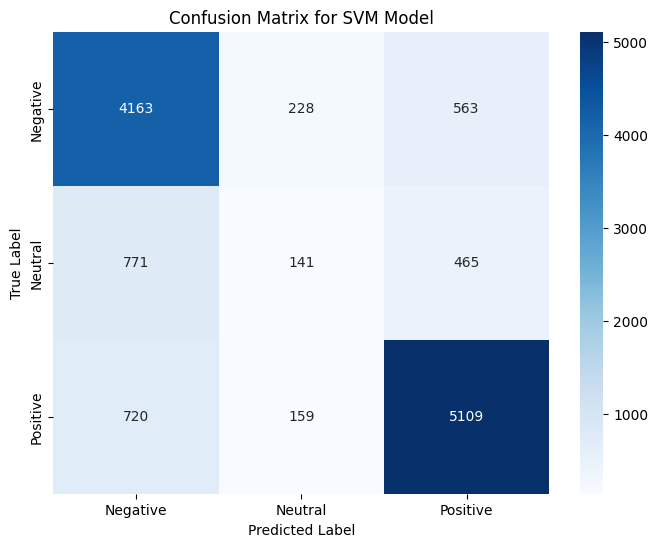

In [20]:
# prompt: buatkan saya conffsion metriks dari SVM model

import matplotlib.pyplot as plt
# Calculate the confusion matrix for SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm, labels=list(label_mapping.keys()))

# Plot the confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM Model')
plt.show()

In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ======================
# PARAMETER GRIDS
# ======================

naive_bayes_params = {
    'alpha': [0.1, 0.5, 1.0]
}

random_forest_params = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None]
}

svm_params = {
    'kernel': ['linear'],
    'C': [0.1, 1.0]
}

logistic_regression_params = {
    'C': [0.1, 1.0]
}

# ======================
# GRID SEARCH BASE MODELS
# ======================

grid_search_nb = GridSearchCV(
    MultinomialNB(),
    naive_bayes_params,
    cv=3,
    scoring="accuracy",
    n_jobs=-1
)
grid_search_nb.fit(X_train_counts, y_train_numeric)
best_nb_model = grid_search_nb.best_estimator_

grid_search_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    random_forest_params,
    cv=3,
    scoring="accuracy",
    n_jobs=-1
)
grid_search_rf.fit(X_train_counts, y_train_numeric)
best_rf_model = grid_search_rf.best_estimator_

grid_search_svm = GridSearchCV(
    SVC(probability=True, random_state=42),  # FIX PENTING
    svm_params,
    cv=3,
    scoring="accuracy",
    n_jobs=-1
)
grid_search_svm.fit(X_train_counts, y_train_numeric)
best_svm_model = grid_search_svm.best_estimator_

# ======================
# META FEATURES (PROBABILITY)
# ======================

X_meta_train = np.hstack([
    best_nb_model.predict_proba(X_train_counts),
    best_rf_model.predict_proba(X_train_counts),
    best_svm_model.predict_proba(X_train_counts)
])

X_meta_test = np.hstack([
    best_nb_model.predict_proba(X_test_counts),
    best_rf_model.predict_proba(X_test_counts),
    best_svm_model.predict_proba(X_test_counts)
])

# ======================
# META MODEL (LOGISTIC REGRESSION)
# ======================

grid_search_meta = GridSearchCV(
    LogisticRegression(
        max_iter=1000,
        multi_class="multinomial",
        solver="lbfgs",
        random_state=42
    ),
    logistic_regression_params,
    cv=3,
    scoring="accuracy",
    n_jobs=-1
)

grid_search_meta.fit(X_meta_train, y_train_numeric)
best_meta_model = grid_search_meta.best_estimator_

# ======================
# EVALUATION
# ======================

y_pred_stacked_numeric = best_meta_model.predict(X_meta_test)

accuracy = accuracy_score(y_test_numeric, y_pred_stacked_numeric)
precision = precision_score(y_test_numeric, y_pred_stacked_numeric, average="weighted")
recall = recall_score(y_test_numeric, y_pred_stacked_numeric, average="weighted")
f1 = f1_score(y_test_numeric, y_pred_stacked_numeric, average="weighted")

print("STACKED MODEL PERFORMANCE")
print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1 Score :", f1)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


STACKED MODEL PERFORMANCE
Accuracy : 0.7744135075899018
Precision: 0.7165986714734931
Recall   : 0.7744135075899018
F1 Score : 0.7322053188858398


In [23]:
import joblib

joblib.dump(best_nb_model, "naive_bayes_model.pkl")
joblib.dump(best_rf_model, "random_forest_model.pkl")
joblib.dump(best_svm_model, "svm_model.pkl")
joblib.dump(best_meta_model, "stacked_meta_model.pkl")
joblib.dump(vectorizer, "count_vectorizer.pkl")


['count_vectorizer.pkl']

In [ ]:
# prompt: Deklarisklan meta model stackign yaitu logistic regression

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

meta_model = LogisticRegression(random_state=42)


X_meta_train = np.column_stack((
    naive_bayes_model.predict(X_train_counts), # Predictions from Naive Bayes on training data
    random_forest_model.predict(X_train_counts), # Predictions from Random Forest on training data
    svm_model.predict(X_train_counts)           # Predictions from SVM on training data
))

X_meta_test = np.column_stack((
    y_pred_numeric, # Predictions from Naive Bayes on test data (already computed)
    y_pred_rf_numeric, # Predictions from Random Forest on test data (already computed)
    y_pred_svm_numeric  # Predictions from SVM on test data (already computed)
))


meta_model.fit(X_meta_train, y_train_numeric)


y_pred_stacked_numeric = meta_model.predict(X_meta_test)

y_pred_stacked = [reverse_label_mapping[pred] for pred in y_pred_stacked_numeric]

accuracy_stacked = accuracy_score(y_test, y_pred_stacked)
precision_stacked = precision_score(y_test, y_pred_stacked, average='weighted')
recall_stacked = recall_score(y_test, y_pred_stacked, average='weighted')
f1_stacked = f1_score(y_test, y_pred_stacked, average='weighted')

print("\nStacked Model (Logistic Regression Meta-model) Performance:")
print("Accuracy:", accuracy_stacked)
print("Precision:", precision_stacked)
print("Recall:", recall_stacked)
print("F1-Score:", f1_stacked)

# Print a detailed classification report for the stacked model
print("\nStacked Model Classification Report:")
print(classification_report(y_test, y_pred_stacked, target_names=label_mapping.keys()))



In [ ]:
# Calculate the confusion matrix for the stacked model
conf_matrix_stacked = confusion_matrix(y_test, y_pred_stacked, labels=list(label_mapping.keys()))

# Plot the confusion matrix for the stacked model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_stacked, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Stacked Model')
plt.show()


In [ ]:
# prompt: buatkan saya hyper parameter dari model stacking, yang sederhana dan tidak memakan waktu trainimg lama


# Base Models:
# Naive Bayes does not have many hyperparameters. alpha is the smoothing parameter.
naive_bayes_params = {
    'alpha': [0.1, 0.5, 1.0]
}


random_forest_params = {
    'n_estimators': [50, 100], # Reduced number of trees
    'max_depth': [10, 20, None], # Limit depth or allow full growth
    'random_state': [42] # Keep for reproducibility
}


svm_params = {
    'kernel': ['linear'], # Simple and fast kernel for text data
    'C': [0.1, 1.0], # Regularization parameter
    'random_state': [42] # Keep for reproducibility
}


logistic_regression_params = {
    'C': [0.1, 1.0], # Regularization parameter
    'random_state': [42] # Keep for reproducibility
}






In [ ]:
# prompt: training hyperparameter diatas dalam model stacking

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Naive Bayes
print("Tuning Naive Bayes...")
grid_search_nb = GridSearchCV(MultinomialNB(), naive_bayes_params, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_nb.fit(X_train_counts, y_train_numeric)
best_nb_model = grid_search_nb.best_estimator_
print("Best Naive Bayes Params:", grid_search_nb.best_params_)
print("Best Naive Bayes Cross-Validation Accuracy:", grid_search_nb.best_score_)

# Hyperparameter tuning for Random Forest
print("\nTuning Random Forest...")
grid_search_rf = GridSearchCV(RandomForestClassifier(), random_forest_params, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train_counts, y_train_numeric)
best_rf_model = grid_search_rf.best_estimator_
print("Best Random Forest Params:", grid_search_rf.best_params_)
print("Best Random Forest Cross-Validation Accuracy:", grid_search_rf.best_score_)

# Hyperparameter tuning for SVM
print("\nTuning SVM...")
grid_search_svm = GridSearchCV(SVC(), svm_params, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_train_counts, y_train_numeric)
best_svm_model = grid_search_svm.best_estimator_
print("Best SVM Params:", grid_search_svm.best_params_)
print("Best SVM Cross-Validation Accuracy:", grid_search_svm.best_score_)

# Use the best base models for stacking
X_meta_train_tuned = np.column_stack((
    best_nb_model.predict(X_train_counts),
    best_rf_model.predict(X_train_counts),
    best_svm_model.predict(X_train_counts)
))

# Get predictions from the best base models on the test data
y_pred_nb_tuned_numeric = best_nb_model.predict(X_test_counts)
y_pred_rf_tuned_numeric = best_rf_model.predict(X_test_counts)
y_pred_svm_tuned_numeric = best_svm_model.predict(X_test_counts)

X_meta_test_tuned = np.column_stack((
    y_pred_nb_tuned_numeric,
    y_pred_rf_tuned_numeric,
    y_pred_svm_tuned_numeric
))

# Hyperparameter tuning for the Meta Model (Logistic Regression)
print("\nTuning Meta Model (Logistic Regression)...")
grid_search_meta = GridSearchCV(LogisticRegression(), logistic_regression_params, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_meta.fit(X_meta_train_tuned, y_train_numeric)
best_meta_model = grid_search_meta.best_estimator_
print("Best Meta Model Params:", grid_search_meta.best_params_)
print("Best Meta Model Cross-Validation Accuracy:", grid_search_meta.best_score_)

# Train the stacked model with the best meta-model on the tuned base model predictions
best_meta_model.fit(X_meta_train_tuned, y_train_numeric)

# Predict using the tuned stacked model
y_pred_stacked_tuned_numeric = best_meta_model.predict(X_meta_test_tuned)

# Map numeric predictions back to original labels for evaluation
y_pred_stacked_tuned = [reverse_label_mapping[pred] for pred in y_pred_stacked_tuned_numeric]

# Evaluate the tuned stacked model
accuracy_stacked_tuned = accuracy_score(y_test, y_pred_stacked_tuned)
precision_stacked_tuned = precision_score(y_test, y_pred_stacked_tuned, average='weighted')
recall_stacked_tuned = recall_score(y_test, y_pred_stacked_tuned, average='weighted')
f1_stacked_tuned = f1_score(y_test, y_pred_stacked_tuned, average='weighted')

print("\nTuned Stacked Model Performance:")
print("Accuracy:", accuracy_stacked_tuned)
print("Precision:", precision_stacked_tuned)
print("Recall:", recall_stacked_tuned)
print("F1-Score:", f1_stacked_tuned)

# Print a detailed classification report for the tuned stacked model
print("\nTuned Stacked Model Classification Report:")
print(classification_report(y_test, y_pred_stacked_tuned, target_names=label_mapping.keys()))

# Calculate the confusion matrix for the tuned stacked model
conf_matrix_stacked_tuned = confusion_matrix(y_test, y_pred_stacked_tuned, labels=list(label_mapping.keys()))

# Plot the confusion matrix for the tuned stacked model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_stacked_tuned, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Tuned Stacked Model')
plt.show()


In [ ]:
import joblib

joblib.dump(best_nb_model, "naive_bayes_model.pkl")
joblib.dump(best_rf_model, "random_forest_model.pkl")
joblib.dump(best_svm_model, "svm_model.pkl")
joblib.dump(best_meta_model, "stacked_meta_model.pkl")
joblib.dump(vectorizer, "count_vectorizer.pkl")
